## Import Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import binom_test

pd.set_option('display.max_rows',500)

In [2]:
df = pd.read_csv("fut_packlog.csv")
df.head(15)

,Event,Date,Pack Type,trsh/door/brd/WO,Top Rating
0,1.0,10/29,Premium Gold Pack,Door,80.0
1,NaN,NaN,NaN,Door,NaN
2,NaN,NaN,NaN,Door,NaN
3,NaN,NaN,NaN,Door,NaN
4,NaN,NaN,NaN,Door,NaN
5,NaN,NaN,NaN,Door,NaN
6,NaN,NaN,NaN,Door,NaN
7,NaN,NaN,NaN,Door,NaN
8,NaN,NaN,NaN,Door,NaN
9,NaN,NaN,NaN,Door,NaN


In [3]:
df.columns

Index(['Event', 'Date', 'Pack Type', 'trsh/door/brd/WO', 'Top Rating'], dtype='object')

## Clean Data - 'Event'

In [4]:
df['Event'].unique()

# Double check that 'Event' column is only numerical values 1-110 (AKA the # of events in data, which is 140)

array([  1.,  nan,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140.])

In [5]:
df['trsh/door/brd/WO'].unique()

# Check if 'trsh/door/brd/WO' column has any typos. Should only be 4 values.
# This column should display "trash, door, board, WO". If values don't match up, change via Find and Replace
# Change after dropping blank rows

array(['Door', 'Board', 'WO'], dtype=object)

## Clean Data - Drop Blank Rows

In [6]:
df.dropna()

,Event,Date,Pack Type,trsh/door/brd/WO,Top Rating
0,1.0,10/29,Premium Gold Pack,Door,80.0
13,1.0,10/29,Premium Gold Pack,Door,80.0
26,1.0,10/29,Premium Gold Pack,Door,79.0
39,1.0,10/29,Premium Gold Pack,Door,78.0
52,1.0,10/29,Premium Gold Pack,Door,78.0
...,...,...,...,...,...
17837,140.0,10/17,premium gold pack,Door,79.0
17838,140.0,10/17,premium gold pack,Door,80.0
17839,140.0,10/17,premium gold pack,Door,77.0
17840,140.0,10/17,premium gold pack,Door,78.0


In [7]:
# newdf with blank rows dropped
data = df.dropna()

In [8]:
data.reset_index(drop=True, inplace=True)

## Clean Data - 'trsh/door/brd/WO'

In [9]:
data['trsh/door/brd/WO'].unique()

array(['Door', 'Board', 'WO'], dtype=object)

In [10]:
# Change to "trash, door, board, WO" by find and replace.

data.replace('doors','door',inplace = True)
data.replace('Board','board',inplace = True)
data.replace('boards','board',inplace = True)
data.replace('boad','board',inplace = True)
data.replace('walkout','WO',inplace = True)
data.replace('Walkout','WO',inplace = True)
data.head(30)

/Users/bryanjamieson/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4278: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Event,Date,Pack Type,trsh/door/brd/WO,Top Rating
0,1.0,10/29,Premium Gold Pack,Door,80.0
1,1.0,10/29,Premium Gold Pack,Door,80.0
2,1.0,10/29,Premium Gold Pack,Door,79.0
3,1.0,10/29,Premium Gold Pack,Door,78.0
4,1.0,10/29,Premium Gold Pack,Door,78.0
5,1.0,10/29,Premium Gold Pack,Door,81.0
6,1.0,10/29,Premium Gold Pack,Door,79.0
7,1.0,10/29,Premium Gold Pack,Door,79.0
8,1.0,10/29,Premium Gold Pack,Door,80.0
9,1.0,10/29,Premium Gold Pack,Door,81.0


## Clean Data - 'Pack Types'

In [11]:
data['Pack Type'].unique()

array(['Premium Gold Pack', 'Jumbo Gold Pack', 'Jumbo Premium Gold Pack',
       'Premium Gold Players Pack', 'Mega Pack', 'Electrum Players Pack',
       'Premium Electrum Players Pack', 'Prime Electrum Players Pack',
       'Rare Electrum Players Pack', 'Rare Mixed Players Pack Pack',
       'Rare Mixed Players Pack', 'gold pack', 'small gold players pack',
       'mixed players pack', 'rare gold pack',
       'Jumbo premoium gold players', 'Rare mixed players pack',
       'Prime Gold Players Pack', 'Prime Mixed Players Pack',
       'Small Rare Gold Players Pack', 'Two Players Pack',
       'Small Electrum Players Pack', 'Small Prime Mixed Players Pack',
       'Small Rare Mixed Players Pack', 'Two player pack',
       'Rare Gold Pack', 'Small Gold Players Pack',
       'Small Prime Gold Players Pack', 'Prime Silver Players Pack',
       'Mixed Players Pack', 'Premium Mixed Players Pack',
       'Two Rare Gold Players Pack', 'Jumbo Premium Gold Players',
       'Rare Players Pack',

In [12]:
# We see duplicate pack types from: misspellings, upper/lower case issues, spacing issues
# So we change the duplicates/problem packs to one common name for each different pack types

In [13]:
data.replace('Small Prime Electrum Players Pack','small prime electrum players pack',inplace=True)
data.replace('Small Prime Electurm Players Pack','small prime electrum players pack',inplace=True)
data.replace('Jumbo Premium Gold Players Pack','jumbo premium gold players pack',inplace=True)
data.replace('Small Prime Mixed Players Pack','small prime mixed players pack',inplace=True)
data.replace('Small Prime Gold Players pack','small prime gold players pack',inplace=True)
data.replace('Jumbo Premium Gold Players','jumbo premium gold players pack',inplace=True)
data.replace('Jumbo premoium gold players','jumbo premium gold players pack',inplace=True)
data.replace('Jumbo Rare Gold Players Pack','jumbo rare gold players pack',inplace=True)
data.replace('Small Prime Gold Player Pack','small prime gold players pack',inplace=True)
data.replace('Small Prime Gold Player Pack','small prime gold players pack',inplace=True)
data.replace('Small Rare Gold Players Pack','small rare gold players pack',inplace=True)
data.replace('Small Rare gold players pack','small rare gold players pack',inplace=True)
data.replace('Small Rare Mixed Players Pack','small rare mixed players pack',inplace=True)
data.replace('Small Rare mixed Players Pack','small rare mixed players pack',inplace=True)
data.replace('Premium Electrum Players Pack','premium electrum players pack',inplace=True)
data.replace('Gold Premium Players Pack','premium gold players pack',inplace=True)
data.replace('Jumbo Premium Gold 26 Pack','jumbo premium gold 26 pack',inplace=True)
data.replace('Jumbo Premium Gold Pack','jumbo premium gold pack',inplace=True)
data.replace('Jumbo Rare Player Pack','jumbo rare players pack',inplace=True)
data.replace('Jumbo Rare Players Pack','jumbo rare players pack',inplace=True)
data.replace('One Rare Player Pack','one rare player pack',inplace=True)
data.replace('PL Premium Players Pack','pl premium players pack',inplace=True)
data.replace('Premium Gold Jumbo Pack','jumbo premium gold pack',inplace=True)
data.replace('Premium Gold Players Pack','premium gold players pack',inplace=True)
data.replace('Premium Jumbo Gold 26 Pack','jumbo premium gold 26 pack',inplace=True)
data.replace('Premium Jumbo Gold Pack','jumbo premium gold pack',inplace=True)
data.replace('Premium Mixed Players Pack','premium mixed players pack',inplace=True)
data.replace('Prime Electrum Players Pack','prime electrum players pack',inplace=True)
data.replace('Prime electrum players pack','prime electrum players pack',inplace=True)
data.replace('Prime Gold Players Pack','prime gold players pack',inplace=True)
data.replace('Prime Mixed Players Pack','prime mixed players pack',inplace=True)
data.replace('Prime Silver Players Pack','prime silver players pack',inplace=True)
data.replace('Rare Electrum Players Pack','rare electrum players pack',inplace=True)
data.replace('Rare Mixed Players Pack','rare mixed players pack',inplace=True)
data.replace('Rare mixed players pack','rare mixed players pack',inplace=True)
data.replace('Rare Mixed Players Pack Pack','rare mixed players pack',inplace=True)
data.replace('Small Gold Players Pack','small gold players pack',inplace=True)
data.replace('Small Gold Players pack','small gold players pack',inplace=True)
data.replace('Two Rare Gold Player Pack','two rare gold players pack',inplace=True)
data.replace('Two Rare Gold Players Pack','two rare gold players pack',inplace=True)
data.replace('Two UCL Common Player Pack','two ucl common players pack',inplace=True)
data.replace('UCL Rare Player Pack','ucl rare player pack',inplace=True)
data.replace('UCL Three Player Pack','ucl three player pack',inplace=True)
data.replace('Electrum Players Pack','electrum players pack',inplace=True)
data.replace('Mixed Players Pack','mixed players pack',inplace=True)
data.replace('Rare Players Pack','rare players pack',inplace=True)
data.replace('Jumbo Gold Pack','jumbo gold pack',inplace=True)
data.replace('Rare Gold Pack','rare gold pack',inplace=True)
data.replace('Rare Mega Pack','rare mega pack',inplace=True)
data.replace('Rare Mega Pack ','rare mega pack',inplace=True)
data.replace('Ultimate Pack','ultimate pack',inplace=True)
data.replace('Two player pack','two players pack',inplace=True)
data.replace('Two Player Pack','two players pack',inplace=True)
data.replace('Two Players Pack','two players pack',inplace=True)
data.replace('Gold 13 Pack','gold 13 pack',inplace=True)
data.replace('Gold 26 Pack','gold 26 pack',inplace=True)
data.replace('Gold Players Pack','gold players pack',inplace=True)
data.replace('Premium Gold Pack','premium gold pack',inplace=True)
data.replace('Mega Pack','mega pack',inplace=True)
data.replace('Gold Pack','gold pack',inplace=True)

data.head(300)

/Users/bryanjamieson/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4278: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Event,Date,Pack Type,trsh/door/brd/WO,Top Rating
0,1.0,10/29,premium gold pack,Door,80.0
1,1.0,10/29,premium gold pack,Door,80.0
2,1.0,10/29,premium gold pack,Door,79.0
3,1.0,10/29,premium gold pack,Door,78.0
4,1.0,10/29,premium gold pack,Door,78.0
5,1.0,10/29,premium gold pack,Door,81.0
6,1.0,10/29,premium gold pack,Door,79.0
7,1.0,10/29,premium gold pack,Door,79.0
8,1.0,10/29,premium gold pack,Door,80.0
9,1.0,10/29,premium gold pack,Door,81.0


In [14]:
data['Pack Type'].unique()

array(['premium gold pack', 'jumbo gold pack', 'jumbo premium gold pack',
       'premium gold players pack', 'mega pack', 'electrum players pack',
       'premium electrum players pack', 'prime electrum players pack',
       'rare electrum players pack', 'rare mixed players pack',
       'gold pack', 'small gold players pack', 'mixed players pack',
       'rare gold pack', 'jumbo premium gold players pack',
       'prime gold players pack', 'prime mixed players pack',
       'small rare gold players pack', 'two players pack',
       'Small Electrum Players Pack', 'small prime mixed players pack',
       'small rare mixed players pack', 'Small Prime Gold Players Pack',
       'prime silver players pack', 'premium mixed players pack',
       'two rare gold players pack', 'rare players pack',
       'ucl three player pack', 'small prime electrum players pack',
       'jumbo premium gold 26 pack', 'rare mega pack',
       'jumbo rare players pack', 'two ucl common players pack',
       'g

In [15]:
data.drop(columns=['Event','trsh/door/brd/WO','Date'],inplace=True)

# Drop columns, left code for find and replace as reference for later anaylsis. 

/Users/bryanjamieson/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2005 entries, 0 to 2004
Data columns (total 2 columns):
Pack Type     2005 non-null object
Top Rating    2005 non-null float64
dtypes: float64(1), object(1)
memory usage: 31.5+ KB


In [17]:
grouped = data.groupby(['Pack Type'])
grouped.head()

,Pack Type,Top Rating
0,premium gold pack,80.0
1,premium gold pack,80.0
2,premium gold pack,79.0
3,premium gold pack,78.0
4,premium gold pack,78.0
25,jumbo gold pack,77.0
26,jumbo premium gold pack,81.0
27,premium gold players pack,84.0
28,premium gold players pack,82.0
29,premium gold players pack,82.0


In [18]:
for pack, group in grouped:
    print('Pack Type')
    print(group)
    print()

Pack Type
                       Pack Type  Top Rating
76   Small Electrum Players Pack        75.0
265  Small Electrum Players Pack        76.0
824  Small Electrum Players Pack        76.0
855  Small Electrum Players Pack        78.0
879  Small Electrum Players Pack        76.0

Pack Type
                          Pack Type  Top Rating
95    Small Prime Gold Players Pack        81.0
113   Small Prime Gold Players Pack        83.0
239   Small Prime Gold Players Pack        84.0
249   Small Prime Gold Players Pack        80.0
281   Small Prime Gold Players Pack        83.0
282   Small Prime Gold Players Pack        80.0
386   Small Prime Gold Players Pack        81.0
387   Small Prime Gold Players Pack        82.0
388   Small Prime Gold Players Pack        82.0
410   Small Prime Gold Players Pack        79.0
427   Small Prime Gold Players Pack        83.0
428   Small Prime Gold Players Pack        84.0
429   Small Prime Gold Players Pack        79.0
473   Small Prime Gold Players Pack  

In [19]:
print(grouped.groups)

# Verify values + index are the same using eye test

{'Small Electrum Players Pack': Int64Index([76, 265, 824, 855, 879], dtype='int64'), 'Small Prime Gold Players Pack': Int64Index([  95,  113,  239,  249,  281,  282,  386,  387,  388,  410,  427,
             428,  429,  473,  474,  536,  537,  538,  548,  639,  650,  748,
             797,  840,  841,  883,  909,  910,  972, 1006, 1059],
           dtype='int64'), 'electrum players pack': Int64Index([ 33,  96, 114, 243, 286, 394, 435, 542, 543, 544, 640, 808, 809,
            844, 845, 878, 881, 886, 932, 949],
           dtype='int64'), 'gold 13 pack': Int64Index([730, 1088], dtype='int64'), 'gold 26 pack': Int64Index([1002], dtype='int64'), 'gold pack': Int64Index([  52,  169,  170,  232,  267,  557,  611,  612,  613,  614,
            ...
            1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679],
           dtype='int64', length=168), 'gold players pack': Int64Index([ 299,  353,  384,  526,  630,  646,  647,  672,  673,  687,  742,
             862,  925,  970,  978, 

In [20]:
print(len(grouped.groups))

41


In [21]:
# need avg top rating by probability

In [22]:
grouped.mean()

,Top Rating
Pack Type,
Small Electrum Players Pack,76.200000
Small Prime Gold Players Pack,81.935484
electrum players pack,79.500000
gold 13 pack,79.000000
gold 26 pack,85.000000
gold pack,78.625000
gold players pack,80.176471
jumbo gold pack,79.619048
jumbo premium gold 26 pack,81.200000


In [23]:
print(data['Pack Type'].nunique())

41


In [24]:
data['Pack Type'].value_counts()

premium gold pack                    750
gold pack                            168
rare players pack                    152
premium gold players pack            127
mega pack                            120
jumbo premium gold pack               94
rare electrum players pack            55
prime gold players pack               48
premium electrum players pack         45
rare gold pack                        43
prime electrum players pack           42
rare mixed players pack               39
Small Prime Gold Players Pack         31
small gold players pack               29
small prime electrum players pack     26
premium mixed players pack            24
jumbo gold pack                       21
small rare mixed players pack         21
electrum players pack                 20
gold players pack                     17
prime mixed players pack              17
rare mega pack                        15
mixed players pack                    15
small rare gold players pack          14
two rare gold pl

In [25]:
grouped.describe()

Top Rating                             \
                                       count       mean       std   min   
Pack Type                                                                 
Small Electrum Players Pack              5.0  76.200000  1.095445  75.0   
Small Prime Gold Players Pack           31.0  81.935484  1.860743  79.0   
electrum players pack                   20.0  79.500000  2.724161  75.0   
gold 13 pack                             2.0  79.000000  4.242641  76.0   
gold 26 pack                             1.0  85.000000       NaN  85.0   
gold pack                              168.0  78.625000  2.089860  75.0   
gold players pack                       17.0  80.176471  1.550617  78.0   
jumbo gold pack                         21.0  79.619048  1.430950  77.0   
jumbo premium gold 26 pack               5.0  81.200000  2.489980  79.0   
jumbo premium gold pack                 94.0  80.765957  2.464481  76.0   
jumbo premium gold players pack         13.0  82.923077  0.759555  82.0   
jumbo rare gold players pack             1.0  85.000000       NaN  85.0   
jumbo rare players pack                  9.0  85.222222  3.492054  82.0   
mega pack                              120.0  82.916667  1.867832  78.0   
mixed players pack                      15.0  78.866667  1.355764  76.0   
one rare player pack                     1.0  78.000000       NaN  78.0   
pl premium players pack                  1.0  84.000000       NaN  84.0   
premium electrum players pack           45.0  81.200000  2.389370  76.0   
premium gold pack                      750.0  79.308000  2.344169  75.0   
premium gold players pack              127.0  81.692913  2.041287  78.0   
premium mixed players pack              24.0  80.541667  2.021174  76.0   
prime electrum players pack             42.0  81.761905  2.150548  78.0   
prime gold players pack                 48.0  82.750000  2.047313  80.0   
prime mixed players pack                17.0  82.352941  2.596661  78.0   
prime silver players pack                1.0  74.000000       NaN  74.0   
rare electrum players pack              55.0  83.000000  2.501851  79.0   
rare gold pack                          43.0  82.279070  2.788801  78.0   
rare mega pack                          15.0  83.266667  2.051712  81.0   
rare mixed players pack                 39.0  81.743590  2.173016  77.0   
rare players pack                      152.0  83.980263  1.991606  81.0   
small gold players pack                 29.0  80.448276  2.114342  77.0   
small prime electrum players pack       26.0  79.923077  2.171139  75.0   
small prime gold players pack            4.0  81.000000  2.160247  78.0   
small prime mixed players pack           4.0  78.250000  2.629956  76.0   
small rare gold players pack            14.0  82.785714  1.368805  80.0   
small rare mixed players pack           21.0  80.857143  2.535463  77.0   
two players pack                         8.0  78.250000  2.815772  75.0   
two rare gold players pack              13.0  80.384615  1.757767  78.0   
two ucl common players pack              1.0  80.000000       NaN  80.0   
ucl three player pack                    1.0  79.000000       NaN  79.0   
ultimate pack                            2.0  87.000000  1.414214  86.0   

                                                             
                                     25%   50%    75%   max  
Pack Type                                                    
Small Electrum Players Pack        76.00  76.0  76.00  78.0  
Small Prime Gold Players Pack      81.00  82.0  83.00  87.0  
electrum players pack              78.00  79.5  80.00  88.0  
gold 13 pack                       77.50  79.0  80.50  82.0  
gold 26 pack                       85.00  85.0  85.00  85.0  
gold pack                          77.00  78.0  80.00  87.0  
gold players pack                  79.00  80.0  81.00  84.0  
jumbo gold pack                    79.00  80.0  80.00  83.0  
jumbo premium gold 26 pack         79.00  81.0  82.

In [26]:
# Drop pack if under 10 entries
# small electrum players pack, gold 13 pack, gold 26 pack, jumbo premium gold 26 pack, jumbo rare gold players pack,
# one rare player pack, pl premium players pack, prime silver players pack, small prime gold players pack
# small prime mixed players pack, two players pack, two ucl common players pack, ucl three player pack, ultimate pack

In [27]:
# data.loc[76,'Top Rating']

#this proves there is a top rating value for small electrum players pack, but nothing shows up"

### Finding True Pack Probabilities

## Packs to investigate:
##### 1: gold pack
##### 2: premium gold pack
##### 3: premium gold players pack
##### 4: jumbo premium gold pack
##### 5: prime gold players pack
##### 6: rare gold pack
##### 7: mega pack
##### 8: rare players pack
##### 9: premium electrum players pack

## 1: Gold Pack

#### Odds:
#### Gold 75+ : 100.00%
#### Gold 82+ : 7.70%
#### Gold 84+ : 3.40%

In [28]:
gold_pack_75 = data.loc[((data['Pack Type'] == 'gold pack') & (data['Top Rating'] >= 75))]

In [29]:
gold_pack_82 = data.loc[((data['Pack Type'] == 'gold pack') & (data['Top Rating'] >= 82))]

In [30]:
gold_pack_84 = data.loc[((data['Pack Type'] == 'gold pack') & (data['Top Rating'] >= 84))]

In [31]:
print(f'75+ Count : {len(gold_pack_75)}')
print(f'82+ Count : {len(gold_pack_82)}')
print(f'84+ Count : {len(gold_pack_84)}')

75+ Count : 168
82+ Count : 20
84+ Count : 4


In [32]:
gold_pack_75_num = len(data[(data['Pack Type'] == 'gold pack') & (data['Top Rating'] >= 75)])
gold_pack_82_num = len(data[(data['Pack Type'] == 'gold pack') & (data['Top Rating'] >= 82)])
gold_pack_84_num = len(data[(data['Pack Type'] == 'gold pack') & (data['Top Rating'] >= 84)])

print(gold_pack_75_num)
print(gold_pack_82_num)
print(gold_pack_84_num)

168
20
4


In [33]:
gold_pack_denom = len(data[(data['Pack Type'] == 'gold pack')])
gold_pack_denom

168

In [34]:
gold_pack_75_percent = gold_pack_75_num/gold_pack_denom
gold_pack_82_percent = gold_pack_82_num/gold_pack_denom
gold_pack_84_percent = gold_pack_84_num/gold_pack_denom


print(gold_pack_75_percent)
print(gold_pack_82_percent)
print(gold_pack_84_percent)

1.0
0.11904761904761904
0.023809523809523808


In [35]:
gold_pack_82

#weird that I never got an 83

,Pack Type,Top Rating
169,gold pack,82.0
267,gold pack,82.0
709,gold pack,82.0
774,gold pack,82.0
782,gold pack,82.0
854,gold pack,82.0
994,gold pack,82.0
1013,gold pack,82.0
1019,gold pack,85.0
1034,gold pack,82.0


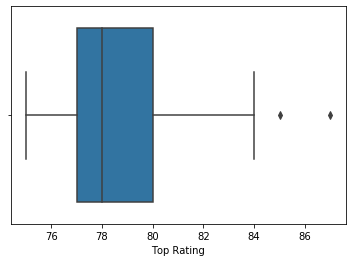

In [36]:
sns.boxplot(data[(data['Pack Type'] == 'gold pack')]['Top Rating']);

## 2: Premium Gold Pack

#### Odds:
#### Gold 75+ : 100.00%
#### Gold 82+ : 19.00%
#### Gold 84+ : 4.90%

In [37]:
premium_gold_pack_75 = data.loc[((data['Pack Type'] == 'premium gold pack') & (data['Top Rating'] >= 75))]
premium_gold_pack_82 = data.loc[((data['Pack Type'] == 'premium gold pack') & (data['Top Rating'] >= 82))]
premium_gold_pack_84 = data.loc[((data['Pack Type'] == 'premium gold pack') & (data['Top Rating'] >= 84))]

In [38]:
print(f'75+ Count : {len(premium_gold_pack_75)}')
print(f'82+ Count : {len(premium_gold_pack_82)}')
print(f'84+ Count : {len(premium_gold_pack_84)}')

75+ Count : 750
82+ Count : 124
84+ Count : 25


In [39]:
premium_gold_pack_75_num = len(data[(data['Pack Type'] == 'premium gold pack') & (data['Top Rating'] >= 75)])
premium_gold_pack_82_num = len(data[(data['Pack Type'] == 'premium gold pack') & (data['Top Rating'] >= 82)])
premium_gold_pack_84_num = len(data[(data['Pack Type'] == 'premium gold pack') & (data['Top Rating'] >= 84)])

print(premium_gold_pack_75_num)
print(premium_gold_pack_82_num)
print(premium_gold_pack_84_num)

#data[(data['Pack Type'] == 'premium gold pack') & (data['Top Rating'] >= 82)]

750
124
25


In [40]:
premium_gold_pack_denom = len(data[(data['Pack Type'] == 'premium gold pack')])
premium_gold_pack_denom

750

In [41]:
premium_gold_pack_75_percent = premium_gold_pack_75_num/premium_gold_pack_denom
premium_gold_pack_82_percent = premium_gold_pack_82_num/premium_gold_pack_denom
premium_gold_pack_84_percent = premium_gold_pack_84_num/premium_gold_pack_denom


print(premium_gold_pack_75_percent)
print(premium_gold_pack_82_percent)
print(premium_gold_pack_84_percent)

1.0
0.16533333333333333
0.03333333333333333


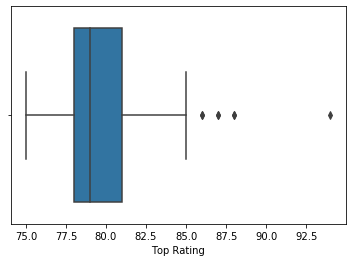

In [42]:
sns.boxplot(data[(data['Pack Type'] == 'premium gold pack')]['Top Rating']);

## 3: Premium Gold Players Pack

#### Odds:
#### Gold 75+ : 100.00%
#### Gold 82+ : 59.00%
#### Gold 86+ : 3.60%

In [43]:
premium_gold_players_pack_75 = data.loc[((data['Pack Type'] == 'premium gold players pack') & (data['Top Rating'] >= 75))]
premium_gold_players_pack_82 = data.loc[((data['Pack Type'] == 'premium gold players pack') & (data['Top Rating'] >= 82))]
premium_gold_players_pack_86 = data.loc[((data['Pack Type'] == 'premium gold players pack') & (data['Top Rating'] >= 86))]

In [44]:
print(f'75+ Count : {len(premium_gold_players_pack_75)}')
print(f'82+ Count : {len(premium_gold_players_pack_82)}')
print(f'86+ Count : {len(premium_gold_players_pack_86)}')

75+ Count : 127
82+ Count : 66
86+ Count : 6


In [45]:
premium_gold_players_pack_75_num = len(data[(data['Pack Type'] == 'premium gold players pack') & (data['Top Rating'] >= 75)])
premium_gold_players_pack_82_num = len(data[(data['Pack Type'] == 'premium gold players pack') & (data['Top Rating'] >= 82)])
premium_gold_players_pack_86_num = len(data[(data['Pack Type'] == 'premium gold players pack') & (data['Top Rating'] >= 86)])

print(premium_gold_players_pack_75_num)
print(premium_gold_players_pack_82_num)
print(premium_gold_players_pack_86_num)

127
66
6


In [46]:
premium_gold_players_pack_denom = len(data[(data['Pack Type'] == 'premium gold players pack')])
premium_gold_players_pack_denom

127

In [47]:
premium_gold_players_pack_75_percent = premium_gold_players_pack_75_num/premium_gold_players_pack_denom
premium_gold_players_pack_82_percent = premium_gold_players_pack_82_num/premium_gold_players_pack_denom
premium_gold_players_pack_86_percent = premium_gold_players_pack_86_num/premium_gold_players_pack_denom


print(premium_gold_players_pack_75_percent)
print(premium_gold_players_pack_82_percent)
print(premium_gold_players_pack_86_percent)

1.0
0.5196850393700787
0.047244094488188976


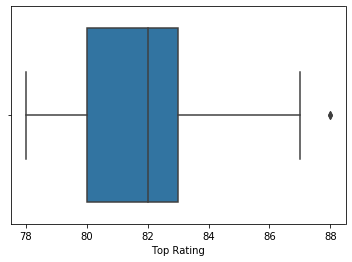

In [48]:
sns.boxplot(data[(data['Pack Type'] == 'premium gold players pack')]['Top Rating']);

## 4: Jumbo Premium Gold Pack

#### Odds:
#### Gold 75+ : 100.00%
#### Gold 82+ : 42.00%
#### Gold 85+ : 4.60%

In [49]:
jumbo_premium_gold_pack_75 = data.loc[((data['Pack Type'] == 'jumbo premium gold pack') & (data['Top Rating'] >= 75))]
jumbo_premium_gold_pack_82 = data.loc[((data['Pack Type'] == 'jumbo premium gold pack') & (data['Top Rating'] >= 82))]
jumbo_premium_gold_pack_85 = data.loc[((data['Pack Type'] == 'jumbo premium gold pack') & (data['Top Rating'] >= 85))]

In [50]:
print(f'75+ Count : {len(jumbo_premium_gold_pack_75)}')
print(f'82+ Count : {len(jumbo_premium_gold_pack_82)}')
print(f'85+ Count : {len(jumbo_premium_gold_pack_85)}')

75+ Count : 94
82+ Count : 33
85+ Count : 4


In [51]:
jumbo_premium_gold_pack_75_num = len(data[(data['Pack Type'] == 'jumbo premium gold pack') & (data['Top Rating'] >= 75)])
jumbo_premium_gold_pack_82_num = len(data[(data['Pack Type'] == 'jumbo premium gold pack') & (data['Top Rating'] >= 82)])
jumbo_premium_gold_pack_85_num = len(data[(data['Pack Type'] == 'jumbo premium gold pack') & (data['Top Rating'] >= 85)])

print(jumbo_premium_gold_pack_75_num)
print(jumbo_premium_gold_pack_82_num)
print(jumbo_premium_gold_pack_85_num)

94
33
4


In [52]:
jumbo_premium_gold_pack_denom = len(data[(data['Pack Type'] == 'jumbo premium gold pack')])
jumbo_premium_gold_pack_denom

94

In [53]:
jumbo_premium_gold_pack_75_percent = jumbo_premium_gold_pack_75_num/jumbo_premium_gold_pack_denom
jumbo_premium_gold_pack_82_percent = jumbo_premium_gold_pack_82_num/jumbo_premium_gold_pack_denom
jumbo_premium_gold_pack_85_percent = jumbo_premium_gold_pack_85_num/jumbo_premium_gold_pack_denom


print(jumbo_premium_gold_pack_75_percent)
print(jumbo_premium_gold_pack_82_percent)
print(jumbo_premium_gold_pack_85_percent)

1.0
0.35106382978723405
0.0425531914893617


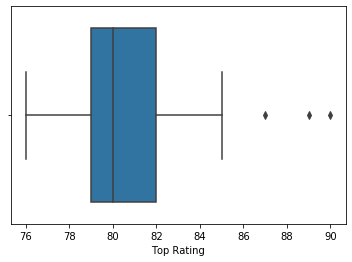

In [54]:
sns.boxplot(data[(data['Pack Type'] == 'jumbo premium gold pack')]['Top Rating']);

## 5: Prime Gold Players Pack

#### Odds:
#### Gold 75+ : 100.00%
#### Gold 82+ : 80.00%
#### Gold 87+ : 4.20%

In [55]:
prime_gold_players_pack_75 = data.loc[((data['Pack Type'] == 'prime gold players pack') & (data['Top Rating'] >= 75))]
prime_gold_players_pack_82 = data.loc[((data['Pack Type'] == 'prime gold players pack') & (data['Top Rating'] >= 82))]
prime_gold_players_pack_87 = data.loc[((data['Pack Type'] == 'prime gold players pack') & (data['Top Rating'] >= 87))]

In [56]:
print(f'75+ Count : {len(prime_gold_players_pack_75)}')
print(f'82+ Count : {len(prime_gold_players_pack_82)}')
print(f'87+ Count : {len(prime_gold_players_pack_87)}')

75+ Count : 48
82+ Count : 36
87+ Count : 3


In [57]:
prime_gold_players_pack_75_num = len(data[(data['Pack Type'] == 'prime gold players pack') & (data['Top Rating'] >= 75)])
prime_gold_players_pack_82_num = len(data[(data['Pack Type'] == 'prime gold players pack') & (data['Top Rating'] >= 82)])
prime_gold_players_pack_87_num = len(data[(data['Pack Type'] == 'prime gold players pack') & (data['Top Rating'] >= 87)])

print(prime_gold_players_pack_75_num)
print(prime_gold_players_pack_82_num)
print(prime_gold_players_pack_87_num)

48
36
3


In [58]:
prime_gold_players_pack_denom = len(data[(data['Pack Type'] == 'prime gold players pack')])
prime_gold_players_pack_denom

48

In [59]:
prime_gold_players_pack_75_percent = prime_gold_players_pack_75_num/prime_gold_players_pack_denom
prime_gold_players_pack_82_percent = prime_gold_players_pack_82_num/prime_gold_players_pack_denom
prime_gold_players_pack_84_percent = prime_gold_players_pack_87_num/prime_gold_players_pack_denom


print(prime_gold_players_pack_75_percent)
print(prime_gold_players_pack_82_percent)
print(prime_gold_players_pack_84_percent)

1.0
0.75
0.0625


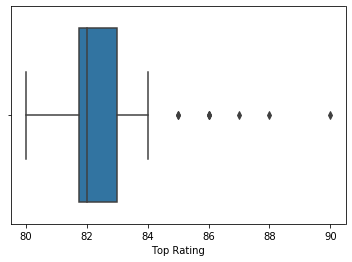

In [60]:
sns.boxplot(data[(data['Pack Type'] == 'prime gold players pack')]['Top Rating']);

## 6: Rare Gold Pack

#### Odds:
#### Gold 75+ : 100.00%
#### Gold 82+ : 55.00%
#### Gold 86+ : 4.30%

In [61]:
rare_gold_pack_75 = data.loc[((data['Pack Type'] == 'rare gold pack') & (data['Top Rating'] >= 75))]
rare_gold_pack_82 = data.loc[((data['Pack Type'] == 'rare gold pack') & (data['Top Rating'] >= 82))]
rare_gold_pack_86 = data.loc[((data['Pack Type'] == 'rare gold pack') & (data['Top Rating'] >= 86))]

In [62]:
print(f'75+ Count : {len(rare_gold_pack_75)}')
print(f'82+ Count : {len(rare_gold_pack_82)}')
print(f'86+ Count : {len(rare_gold_pack_86)}')

75+ Count : 43
82+ Count : 21
86+ Count : 5


In [63]:
rare_gold_pack_75_num = len(data[(data['Pack Type'] == 'rare gold pack') & (data['Top Rating'] >= 75)])
rare_gold_pack_82_num = len(data[(data['Pack Type'] == 'rare gold pack') & (data['Top Rating'] >= 82)])
rare_gold_pack_86_num = len(data[(data['Pack Type'] == 'rare gold pack') & (data['Top Rating'] >= 86)])

print(rare_gold_pack_75_num)
print(rare_gold_pack_82_num)
print(rare_gold_pack_86_num)

43
21
5


In [64]:
rare_gold_pack_denom = len(data[(data['Pack Type'] == 'rare gold pack')])
rare_gold_pack_denom

43

In [65]:
rare_gold_pack_75_percent = rare_gold_pack_75_num/rare_gold_pack_denom
rare_gold_pack_82_percent = rare_gold_pack_82_num/rare_gold_pack_denom
rare_gold_pack_86_percent = rare_gold_pack_86_num/rare_gold_pack_denom


print(rare_gold_pack_75_percent)
print(rare_gold_pack_82_percent)
print(rare_gold_pack_86_percent)

1.0
0.4883720930232558
0.11627906976744186


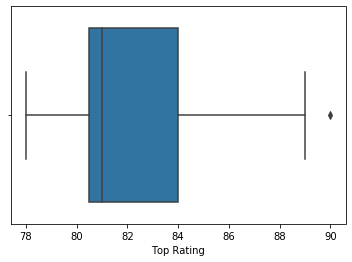

In [66]:
sns.boxplot(data[(data['Pack Type'] == 'rare gold pack')]['Top Rating']);

## 7: Mega Pack

#### Odds:
#### Gold 75+ : 100.00%
#### Gold 82+ : 79.00%
#### Gold 87+ : 4.50%

In [67]:
mega_pack_75 = data.loc[((data['Pack Type'] == 'mega pack') & (data['Top Rating'] >= 75))]
mega_pack_82 = data.loc[((data['Pack Type'] == 'mega pack') & (data['Top Rating'] >= 82))]
mega_pack_87 = data.loc[((data['Pack Type'] == 'mega pack') & (data['Top Rating'] >= 87))]

In [68]:
print(f'75+ Count : {len(mega_pack_75)}')
print(f'82+ Count : {len(mega_pack_82)}')
print(f'87+ Count : {len(mega_pack_87)}')

75+ Count : 120
82+ Count : 102
87+ Count : 4


In [69]:
mega_pack_75_num = len(data[(data['Pack Type'] == 'mega pack') & (data['Top Rating'] >= 75)])
mega_pack_82_num = len(data[(data['Pack Type'] == 'mega pack') & (data['Top Rating'] >= 82)])
mega_pack_87_num = len(data[(data['Pack Type'] == 'mega pack') & (data['Top Rating'] >= 87)])

print(mega_pack_75_num)
print(mega_pack_82_num)
print(mega_pack_87_num)

120
102
4


In [70]:
mega_pack_denom = len(data[(data['Pack Type'] == 'mega pack')])
mega_pack_denom

120

In [71]:
mega_pack_75_percent = mega_pack_75_num/mega_pack_denom
mega_pack_82_percent = mega_pack_82_num/mega_pack_denom
mega_pack_87_percent = mega_pack_87_num/mega_pack_denom


print(mega_pack_75_percent)
print(mega_pack_82_percent)
print(mega_pack_87_percent)

1.0
0.85
0.03333333333333333


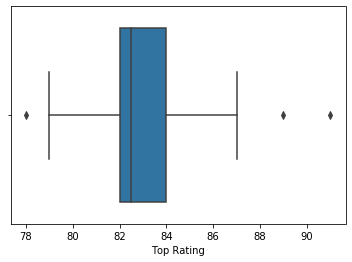

In [72]:
sns.boxplot(data[(data['Pack Type'] == 'mega pack')]['Top Rating']);

## 8: Rare Players Pack

#### Odds:
#### Gold 75+ : 100.00%
#### Gold 82+ : 95.00%
#### Gold 88+ : 5.00%

In [73]:
rare_players_pack_75 = data.loc[((data['Pack Type'] == 'rare players pack') & (data['Top Rating'] >= 75))]
rare_players_pack_82 = data.loc[((data['Pack Type'] == 'rare players pack') & (data['Top Rating'] >= 82))]
rare_players_pack_88 = data.loc[((data['Pack Type'] == 'rare players pack') & (data['Top Rating'] >= 88))]

In [74]:
print(f'75+ Count : {len(rare_players_pack_75)}')
print(f'82+ Count : {len(rare_players_pack_82)}')
print(f'88+ Count : {len(rare_players_pack_88)}')

75+ Count : 152
82+ Count : 147
88+ Count : 14


In [75]:
rare_players_pack_75_num = len(data[(data['Pack Type'] == 'rare players pack') & (data['Top Rating'] >= 75)])
rare_players_pack_82_num = len(data[(data['Pack Type'] == 'rare players pack') & (data['Top Rating'] >= 82)])
rare_players_pack_88_num = len(data[(data['Pack Type'] == 'rare players pack') & (data['Top Rating'] >= 88)])

print(rare_players_pack_75_num)
print(rare_players_pack_82_num)
print(rare_players_pack_88_num)

152
147
14


In [76]:
rare_players_pack_denom = len(data[(data['Pack Type'] == 'rare players pack')])
rare_players_pack_denom

152

In [77]:
rare_players_pack_75_percent = rare_players_pack_75_num/rare_players_pack_denom
rare_players_pack_82_percent = rare_players_pack_82_num/rare_players_pack_denom
rare_players_pack_88_percent = rare_players_pack_88_num/rare_players_pack_denom


print(rare_players_pack_75_percent)
print(rare_players_pack_82_percent)
print(rare_players_pack_88_percent)

1.0
0.9671052631578947
0.09210526315789473


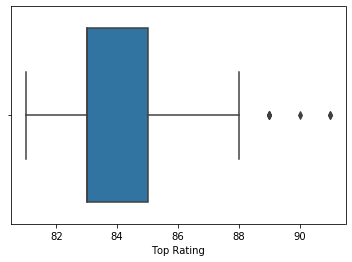

In [78]:
sns.boxplot(data[(data['Pack Type'] == 'rare players pack')]['Top Rating']);

## 9: Premium Electrum Players Pack

#### Odds:
#### Gold 75+ : 100.00%
#### Gold 82+ : 41.00%
#### Gold 85+ : 4.30%

In [79]:
premium_electrum_players_pack_75 = data.loc[((data['Pack Type'] == 'premium electrum players pack') & (data['Top Rating'] >= 75))]
premium_electrum_players_pack_82 = data.loc[((data['Pack Type'] == 'premium electrum players pack') & (data['Top Rating'] >= 82))]
premium_electrum_players_pack_85 = data.loc[((data['Pack Type'] == 'premium electrum players pack') & (data['Top Rating'] >= 85))]

In [80]:
print(f'75+ Count : {len(premium_electrum_players_pack_75)}')
print(f'82+ Count : {len(premium_electrum_players_pack_82)}')
print(f'85+ Count : {len(premium_electrum_players_pack_85)}')

75+ Count : 45
82+ Count : 18
85+ Count : 5


In [81]:
premium_electrum_players_pack_75_num = len(data[(data['Pack Type'] == 'premium electrum players pack') & (data['Top Rating'] >= 75)])
premium_electrum_players_pack_82_num = len(data[(data['Pack Type'] == 'premium electrum players pack') & (data['Top Rating'] >= 82)])
premium_electrum_players_pack_85_num = len(data[(data['Pack Type'] == 'premium electrum players pack') & (data['Top Rating'] >= 85)])

print(premium_electrum_players_pack_75_num)
print(premium_electrum_players_pack_82_num)
print(premium_electrum_players_pack_85_num)

45
18
5


In [82]:
premium_electrum_players_pack_denom = len(data[(data['Pack Type'] == 'premium electrum players pack')])
premium_electrum_players_pack_denom

45

In [83]:
premium_electrum_players_pack_75_percent = premium_electrum_players_pack_75_num/premium_electrum_players_pack_denom
premium_electrum_players_pack_82_percent = premium_electrum_players_pack_82_num/premium_electrum_players_pack_denom
premium_electrum_players_pack_85_percent = premium_electrum_players_pack_85_num/premium_electrum_players_pack_denom


print(premium_electrum_players_pack_75_percent)
print(premium_electrum_players_pack_82_percent)
print(premium_electrum_players_pack_85_percent)

1.0
0.4
0.1111111111111111


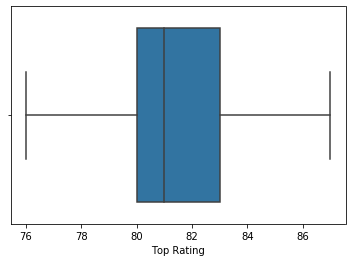

In [84]:
sns.boxplot(data[(data['Pack Type'] == 'premium electrum players pack')]['Top Rating']);

## Hypothesis

### 1) The probabilities of getting good players in FIFA 20 packs are lower than the pack probabilities posted by EA Sports simulation model.

### 2) EA Sports is not telling the truth when it comes to the true probability of getting goods players in packs.

### 3) Could the true probability of getting good players in packs be significant enough to compare this case to DraftKings average DFS contest results? Assuming the true probability is lower than what EA Sports tells us.

## Binomial Test

In [85]:
# Binomial test compares a sample proportion to a hypothesized proportion.

# binom_test(x,n=None,p=0.5,alternative='two-sided')
# x: # of successes
# n: total number of trials
# p: probability of success on each trial
# alternative: alternative hypothesis. Default is 'two-sided' but can also specify 'greater' or 'less'


# alternative = what I want to test for (aka pack weight is lower than advertised)

### 1) Gold Pack - Binomial Test

#### Fifa Odds:
##### Gold 75+ : 100.00%
##### Gold 82+ : 7.70%
##### Gold 84+ : 3.40%


##### My Odds:
#### Gold 75+ : 100.00%
#### Gold 82+ : 12.62%
#### Gold 84+ : 0.97%


#### My Count: n=168
##### 75+ Count : 
##### 82+ Count : 13
##### 84+ Count : 1

In [86]:
# 82+
# h0: rating > 7.7%
# ha: rating <= 7.7%
# x = 20
# n=168
# p=7.7%

binom_test(x=13, n=103, p=.077, alternative='less')

0.97335958096723

In [87]:
# Because the p value (.053) IS NOT less than .05, we fail to reject the null hypothesis.
# We do not have sufficient evidence to say the 82+ pack rating is biased to =< 7.7%

In [88]:
# 84+ 3.4
# h0: rating > 3.4%
# ha: rating <= 3.4%
# x = 4
# n=168
# p=3.4

binom_test(x=1, n=103, p=.034, alternative='less')

0.13115355255735453

In [89]:
# Because the p value (.971) IS NOT less than .05, we fail to reject the null hypothesis.
# We do not have sufficient evidence to say the 84+ pack rating is biased to =< 3.40%

### 2) Premium Gold Pack - Binomial Test

#### Fifa Odds:
##### Gold 75+ : 100.00%
##### Gold 82+ : 19.00%
##### Gold 84+ : 4.90%

#### My Odds:
##### Gold 75+ : 100.00%
##### Gold 82+ : 16.53%
##### Gold 84+ : 3.33%

#### My Count: n=750
##### Gold 75+ : 750
##### Gold 82+ : 124
##### Gold 84+ : 25

In [90]:
# 82+
# h0: get 82+ rating > 21.31% of the time
# ha: get 82+ rating <= 21.31% of the time
# x = 124
# n=750
# p=19%

binom_test(x=124, n=750, p=.19, alternative='less')

0.0451178264841551

In [91]:
# Because the p value (.371) IS NOT less than .05, we fail to reject the null hypothesis.
# We do not have sufficient evidence to say the 82+ pack rating is biased to =< 19%

In [92]:
# 84+
# h0: get 84+ rating > 4.9% of the time
# ha: get 84+ rating <= 4.9% of the time
# x = 22
# n=632
# p=4.9%

binom_test(x=25, n=750, p=.049, alternative='less')

0.023725230916458107

In [93]:
# Because the p value (.158) IS NOT less than .05, we fail to reject the null hypothesis.
# We do not have sufficient evidence to say the 84+ pack rating is biased to =< 4.9%

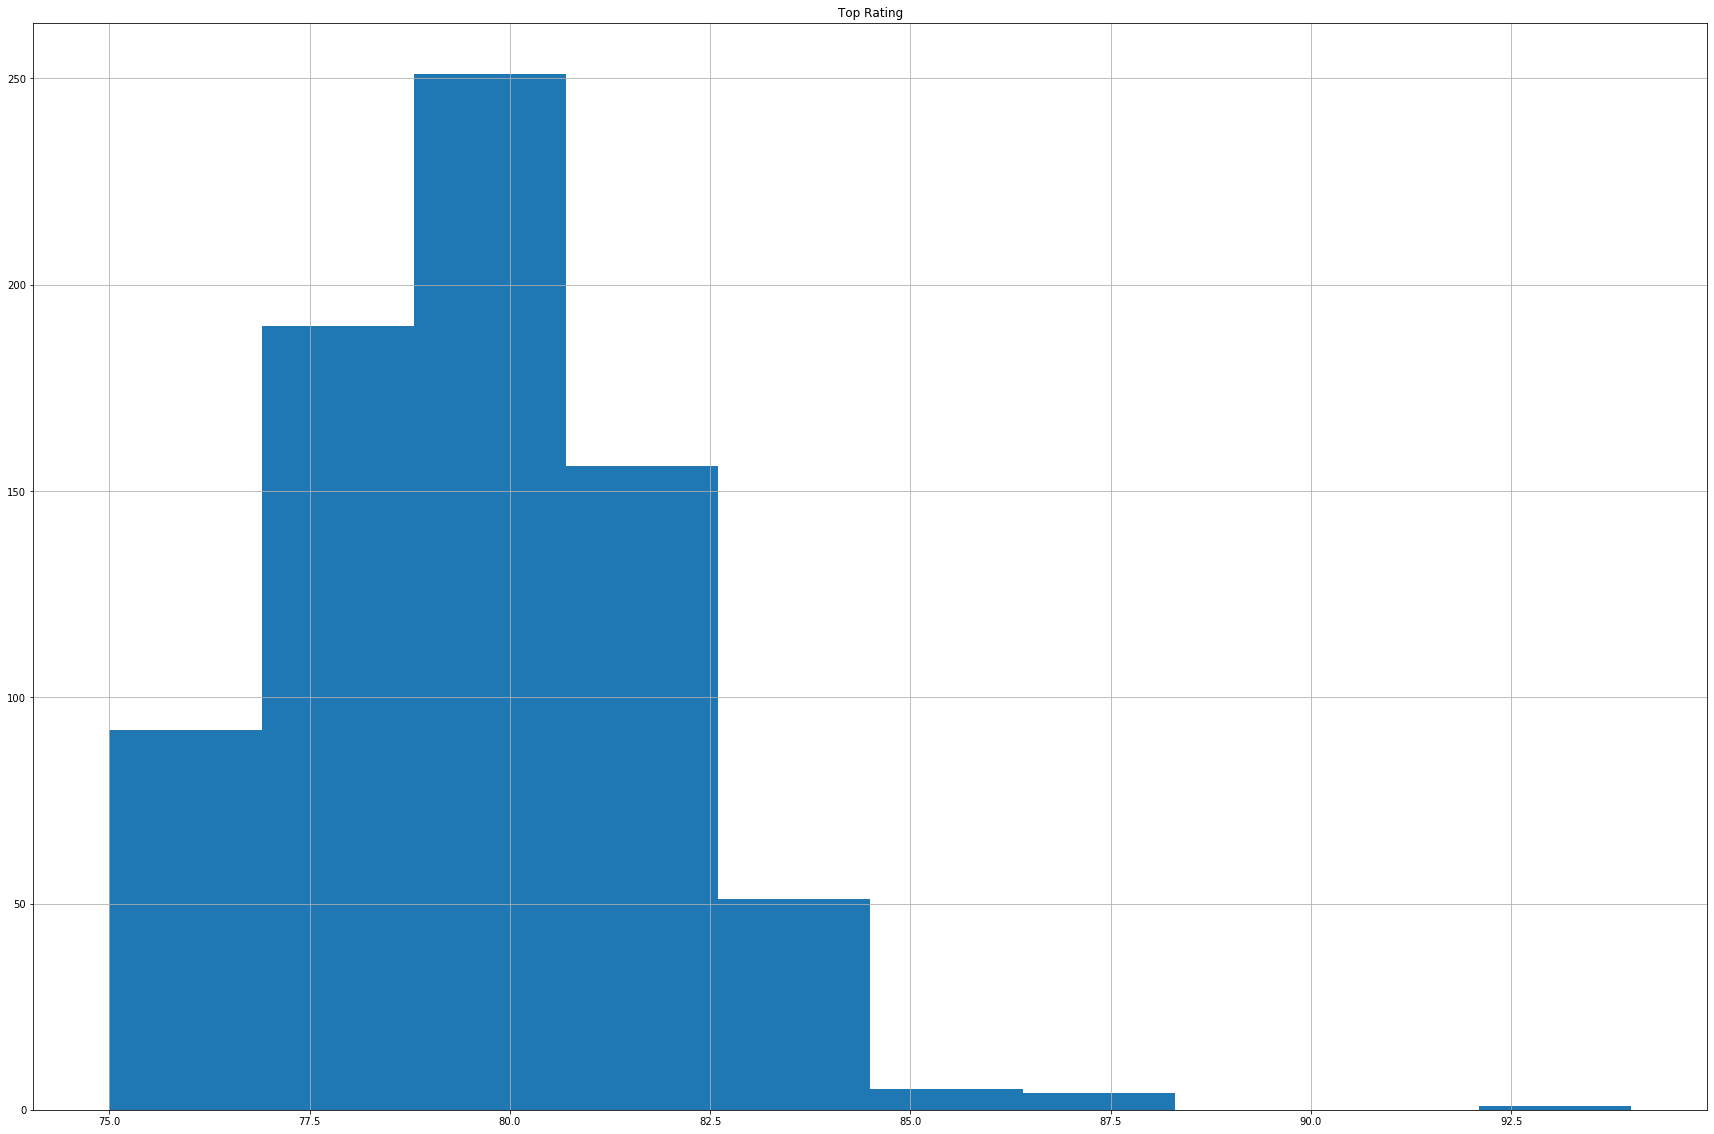

In [94]:
prem = data.loc[((data['Pack Type'] == 'premium gold pack') & (data['Top Rating']))]
prem.hist(figsize=(30,20));

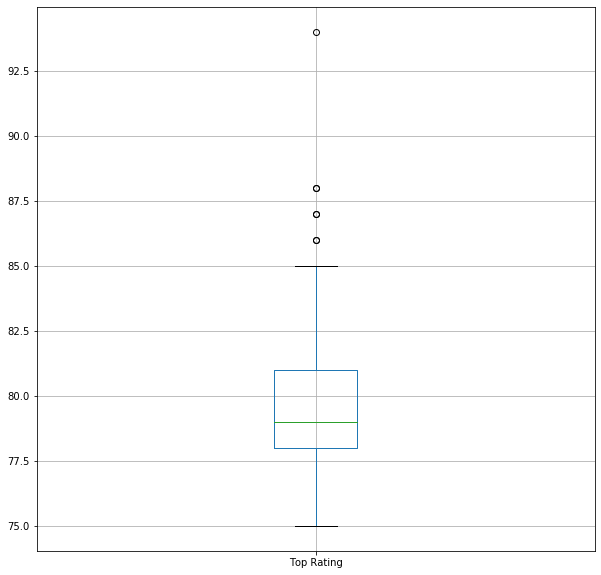

In [95]:
prem.boxplot(figsize=(10,10));

In [ ]:
## Next do a classification to predict a board or walkout from 1000 seperate pack openings

### 3) Premium Gold Players Pack

In [96]:
# 82+
# h0: get 82+ rating > 59% of the time
# ha: get 82+ rating <= 59% of the time
# x = 50
# n=94
# p=59%

binom_test(x=66, n=126, p=.59, alternative='less')

0.07844242877327055

In [97]:
# Because the p value (.893) IS NOT less than .05, we fail to reject the null hypothesis.
# We do not have sufficient evidence to say the 82+ pack rating is biased to =< 59%

In [98]:
# 86+
# h0: get 86+ rating > 4.7% of the time
# ha: get 86+ rating <= 4.7% of the time
# x = 5
# n=61
# p=4.7%

binom_test(x=6, n=126, p=.036, alternative='less')

0.8299294685329522

In [99]:
# Because the p value (.123) IS NOT less than .05, we fail to reject the null hypothesis.
# We do not have sufficient evidence to say the 86+ pack rating is biased to =< 3.6%

### 4) Jumbo Premium Gold Pack

In [100]:
# 82+
# h0: get 82+ rating > 42% of the time
# ha: get 82+ rating <= 42% of the time
# x = 22
# n=64
# p=42%

binom_test(x=33, n=93, p=.42, alternative='less')

0.12087001067648595

In [101]:
# Because the p value (.914) IS NOT less than .05, we fail to reject the null hypothesis.
# We do not have sufficient evidence to say the 82+ pack rating is biased to =< 42%

In [102]:
# 85+
# h0: get 85+ rating > 4.6% of the time
# ha: get 85+ rating <= 4.6% of the time
# x = 4
# n=64
# p=4.6%

binom_test(x=4, n=94, p=.046, alternative='less')

0.5643476171857519

In [103]:
# Because the p value (.339) IS NOT less than .05, we fail to reject the null hypothesis.
# We do not have sufficient evidence to say the 85+ pack rating is biased to =< 4.6%

### 5) Prime Gold Players Pack

In [104]:
# 82+
# h0: get 82+ rating > 80% of the time
# ha: get 82+ rating <= 80% of the time
# x = 36
# n=48
# p=80%

binom_test(x=36, n=48, p=.8, alternative='less')

0.2405189603204061

In [105]:
# Because the p value (.852) IS NOT less than .05, we fail to reject the null hypothesis.
# We do not have sufficient evidence to say the 82+ pack rating is biased to =< 80%

In [106]:
# 87+
# h0: get 87+ rating > 4.2% of the time
# ha: get 87+ rating <= 4.2% of the time
# x = 3
# n=48
# p=4.2%

binom_test(x=3, n=48, p=.042, alternative='less')

0.8581340278601722

In [107]:
# Because the p value (.327) IS NOT less than .05, we fail to reject the null hypothesis.
# We do not have sufficient evidence to say the 87+ pack rating is biased to =< 4.2%

### 6) Rare Gold Pack

In [108]:
# 82+
# h0: get 82+ rating > 55% of the time
# ha: get 82+ rating <= 55% of the time
# x = 21
# n=43
# p=55%

binom_test(x=21, n=43, p=.55, alternative='less')

0.25423300006471183

In [109]:
# Because the p value (.832) IS NOT less than .05, we fail to reject the null hypothesis.
# We do not have sufficient evidence to say the 82+ pack rating is biased to =< 55%

In [110]:
# 86+
# h0: get 86+ rating > 4.3% of the time
# ha: get 86+ rating <= 4.3% of the time
# x = 5
# n=43
# p=4.3%

binom_test(x=5, n=43, p=.043, alternative='less')

0.9901818536808079

In [111]:
# Because the p value (.036) IS less than .05, we reject the null hypothesis.
# We have sufficient evidence to say the 87+ pack rating is biased to =< 4.2%

### 7) Mega Pack

In [112]:
# 82+
# h0: get 82+ rating > 79% of the time
# ha: get 82+ rating <= 79% of the time
# x = 81
# n=95
# p=79%

binom_test(x=100, n=118, p=.79, alternative='less')

0.9545235362441622

In [113]:
# Because the p value (.080) IS NOT less than .05, we fail to reject the null hypothesis.
# We do not have sufficient evidence to say the 82+ pack rating is biased to =< 79%

In [114]:
# 87+
# h0: get 87+ rating > 4.5% of the time
# ha: get 87+ rating <= 4.5% of the time
# x = 4
# n=95
# p=4.5%

binom_test(x=4, n=118, p=.045, alternative='less')

0.38292990615048705

In [115]:
# Because the p value (.623) IS NOT less than .05, we fail to reject the null hypothesis.
# We do not have sufficient evidence to say the 82+ pack rating is biased to =< 4.5%

### 8) Rare Players Pack

In [116]:
# 82+
# h0: get 82+ rating > 95% of the time
# ha: get 82+ rating <= 95% of the time
# x = 100
# n=103
# p=95%

binom_test(x=147, n=152, p=.95, alternative='less')

0.8814043544881202

In [117]:
# Because the p value (.852) IS NOT less than .05, we fail to reject the null hypothesis.
# We do not have sufficient evidence to say the 82+ pack rating is biased to =< 80%

In [118]:
# 88+
# h0: get 88+ rating > 5% of the time
# ha: get 88+ rating <= 5% of the time
# x = 11
# n=103
# p=5%

binom_test(x=14, n=152, p=.05, alternative='less')

0.9904785611008051

In [119]:
# Because the p value (.852) IS NOT less than .05, we fail to reject the null hypothesis.
# We do not have sufficient evidence to say the 82+ pack rating is biased to =< 80%

In [120]:
### 9)Premium Electrum Players Pack

In [121]:
# 82+
# h0: get 82+ rating > 41% of the time
# ha: get 82+ rating <= 41% of the time
# x = 18
# n=45
# p=41%

binom_test(x=18, n=45, p=.41, alternative='less')

0.5096964325764154

In [122]:
# Because the p value (.852) IS NOT less than .05, we fail to reject the null hypothesis.
# We do not have sufficient evidence to say the 82+ pack rating is biased to =< 80%

In [123]:
# 85+
# h0: get 85+ rating > 4.3% of the time
# ha: get 85+ rating <= 4.3% of the time
# x = 5
# n=45
# p=4.3%

binom_test(x=5, n=45, p=.043, alternative='less')

0.987800036577733

In [124]:
# Because the p value (.852) IS NOT less than .05, we fail to reject the null hypothesis.
# We do not have sufficient evidence to say the 82+ pack rating is biased to =< 80%

In [125]:
# https://www.statology.org/binomial-test-python/

# Jeff
# If your p-value is greater than 0.05, that means you fail to reject the null hypothesis and conclude that the actual probability is greater than or equal to what FIFA said
# If your p-value is less than 0.05, you reject the null hypothesis and conclude that the actual probability is less than what FIFA said

# Me
# Because the p value is greater than 0.05, we fail to reject the null hypothesis and conclude that the actual pack probability is greater than or equal to Fifa's stated pack probability.
# Because the p value is less than 0.05, we reject the null hypothesis and conclude that the actual pack probability is less than Fifa's stated pack probability.

## Do pack by WO, board